In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El siguiente dataset habla sobre accidentes de transito en el vamos a contar con 29 columnas que son hora, dia, ubicacion, cantidad de heridos / muertos tanto de ciclistas, motiristas o peatones como tambien informacion acerca de cual era el tipo de vehiculo que tuvo el accidente como tambien acerca de cuantos vehiculos estuvieron involucrados.


--------------------------------------------

Hipotesis:

"Los accidentes de transito tienden a ocurrir con mayor frecuencia durante las horas picos y en areas urbanas grandes.Ademas tienen como resultado una mayor cantidad de muertes que en otras horas"

-------------------------------------------------------------------------------------------------------------------------------------------

Limpieza de dataset

In [84]:
data_accidentes=pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', delimiter=",");

C:\Users\Piero Nicolas\AppData\Local\Temp\ipykernel_3408\3041885380.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_accidentes=pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', delimiter=",");


In [85]:
data_accidentes.shape

(2102132, 29)

In [86]:
data_accidentes.sample(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
590159,08/11/2018,16:55,NaN,NaN,40.785294,-73.969345,"(40.785294, -73.969345)",CENTRAL PARK WEST,NaN,NaN,...,NaN,NaN,NaN,NaN,3959586,Sedan,NaN,NaN,NaN,NaN
389453,06/29/2019,17:40,NaN,NaN,NaN,NaN,NaN,14 AVENUE,BEECHCOURT CIRCLE,NaN,...,Unspecified,NaN,NaN,NaN,4161318,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1361579,04/02/2015,16:15,QUEENS,11360.0,40.779323,-73.775599,"(40.7793235, -73.775599)",BELL BOULEVARD,24 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3197190,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
811225,08/25/2017,23:24,BROOKLYN,11233.0,40.676190,-73.908100,"(40.67619, -73.9081)",EASTERN PARKWAY,ATLANTIC AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3737620,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
477317,02/22/2019,9:15,BROOKLYN,11224.0,40.574036,-73.999430,"(40.574036, -73.99943)",NaN,NaN,2940 WEST 33 STREET,...,Unspecified,NaN,NaN,NaN,4086528,Taxi,Sedan,NaN,NaN,NaN


In [89]:
data_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102132 entries, 0 to 2102131
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [90]:
data_accidentes.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [91]:
df1_accidentes=data_accidentes.drop("ZIP CODE",axis=1)
df1_accidentes=df1_accidentes.drop("ON STREET NAME",axis=1)
df1_accidentes=df1_accidentes.drop("CROSS STREET NAME",axis=1)
df1_accidentes=df1_accidentes.drop("OFF STREET NAME",axis=1)

In [92]:
df1_accidentes

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,2.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,1.0,0.0,0,0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,"(40.667202, -73.8665)",0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,"(40.683304, -73.917274)",0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102127,07/06/2024,13:44,BROOKLYN,40.669834,-73.895360,"(40.669834, -73.89536)",0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,4738503,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2102128,07/05/2024,14:40,BROOKLYN,40.613120,-73.917450,"(40.61312, -73.91745)",0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,4738824,Sedan,NaN,NaN,NaN,NaN
2102129,07/04/2024,0:30,BROOKLYN,40.631203,-74.020660,"(40.631203, -74.02066)",0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,4738841,Station Wagon/Sport Utility Vehicle,Moped,NaN,NaN,NaN
2102130,07/04/2024,22:21,MANHATTAN,40.720320,-73.994050,"(40.72032, -73.99405)",1.0,0.0,1,0,...,NaN,NaN,NaN,NaN,4738870,Sedan,NaN,NaN,NaN,NaN


In [93]:
df1_accidentes.shape

(2102132, 25)

In [94]:
df1_accidentes.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           653880
LATITUDE                          235426
LONGITUDE                         235426
LOCATION                          235426
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6978
CONTRIBUTING FACTOR VEHICLE 2     327774
CONTRIBUTING FACTOR VEHICLE 3    1951468
CONTRIBUTING FACTOR VEHICLE 4    2068007
CONTRIBUTING FACTOR VEHICLE 5    2092872
COLLISION_ID                           0
VEHICLE TYPE CODE 1                14107
VEHICLE TYPE CODE 2               405376
VEHICLE TYPE CODE 3              1957022
VEHICLE TYPE CODE 4              2069204
VEHICLE TYPE COD

In [95]:
df2_accidentes=df1_accidentes.dropna()

In [96]:
df2_accidentes.shape

(5725, 25)

In [148]:
def definir_periodo(x):
    if x>=0 and x<=6:
        return "madrugada"
    if x>6 and x<=12:
        return "mañana"
    if x>12 and x<=18:
        return "tarde"
    if x>18 and x<=23:
        return "noche"

In [149]:
df2_accidentes['hora'] = df2_accidentes['CRASH TIME'].apply(lambda x: pd.to_numeric(x.split(":")[0])) 
df2_accidentes['hora'].dtype

C:\Users\Piero Nicolas\AppData\Local\Temp\ipykernel_3408\3033224711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_accidentes['hora'] = df2_accidentes['CRASH TIME'].apply(lambda x: pd.to_numeric(x.split(":")[0]))


dtype('int64')

In [150]:
df2_accidentes['periodo_dia'] = df2_accidentes['hora'].apply(lambda x: definir_periodo(x)) 
df2_accidentes

C:\Users\Piero Nicolas\AppData\Local\Temp\ipykernel_3408\314455962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_accidentes['periodo_dia'] = df2_accidentes['hora'].apply(lambda x: definir_periodo(x))


,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hora,periodo_dia
335,09/11/2021,2:00,BROOKLYN,40.675390,-73.881130,"(40.67539, -73.88113)",0.0,0.0,0,0,...,Unspecified,Unspecified,4456279,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,2,madrugada
442,09/11/2021,2:05,STATEN ISLAND,40.590313,-74.097940,"(40.590313, -74.09794)",0.0,0.0,0,0,...,Unspecified,Unspecified,4456752,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2,madrugada
898,04/16/2021,7:30,BROOKLYN,40.638313,-73.957510,"(40.638313, -73.95751)",0.0,0.0,0,0,...,Unspecified,Unspecified,4408034,Box Truck,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,7,mañana
1035,04/16/2021,16:28,BROOKLYN,40.694836,-73.969150,"(40.694836, -73.96915)",0.0,0.0,0,0,...,Unspecified,Unspecified,4407859,Pick-up Truck,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,16,tarde
1264,07/05/2021,5:06,QUEENS,40.597824,-73.782524,"(40.597824, -73.782524)",0.0,0.0,0,0,...,Unspecified,Unspecified,4456706,Sedan,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,5,madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101539,07/04/2024,17:38,BROOKLYN,40.670254,-73.992035,"(40.670254, -73.992035)",0.0,0.0,0,0,...,Unspecified,Unspecified,4738626,Sedan,Sedan,Sedan,Sedan,Sedan,17,tarde
2101827,06/26/2024,13:54,MANHATTAN,40.815826,-73.947044,"(40.815826, -73.947044)",5.0,0.0,0,0,...,Unspecified,Unspecified,4738598,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,13,tarde
2101838,07/03/2024,9:45,QUEENS,40.684383,-73.790180,"(40.684383, -73.79018)",2.0,0.0,0,0,...,Unspecified,Unspecified,4737968,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,9,mañana
2101914,07/05/2024,20:30,BROOKLYN,40.641430,-74.020980,"(40.64143, -74.02098)",0.0,0.0,0,0,...,Unspecified,Unspecified,4738695,Sedan,Station Wagon/Sport Utility Vehicle,Tractor Truck Diesel,Station Wagon/Sport Utility Vehicle,Sedan,20,noche


In [147]:
df2_accidentes["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

Unspecified                                              1326
Driver Inattention/Distraction                            939
Alcohol Involvement                                       631
Unsafe Speed                                              577
Traffic Control Disregarded                               321
Failure to Yield Right-of-Way                             199
Driver Inexperience                                       152
Aggressive Driving/Road Rage                              152
Other Vehicular                                           144
Backing Unsafely                                          103
Following Too Closely                                      97
Passing or Lane Usage Improper                             96
Fell Asleep                                                93
Brakes Defective                                           80
Pavement Slippery                                          66
Lost Consciousness                                         62
Fatigued

In [103]:
df2_accidentes

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hora,periodo_dia
335,09/11/2021,2:00,BROOKLYN,40.675390,-73.881130,"(40.67539, -73.88113)",0.0,0.0,0,0,...,Unspecified,Unspecified,4456279,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,2,madrugada
442,09/11/2021,2:05,STATEN ISLAND,40.590313,-74.097940,"(40.590313, -74.09794)",0.0,0.0,0,0,...,Unspecified,Unspecified,4456752,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2,madrugada
898,04/16/2021,7:30,BROOKLYN,40.638313,-73.957510,"(40.638313, -73.95751)",0.0,0.0,0,0,...,Unspecified,Unspecified,4408034,Box Truck,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,7,madrugada
1035,04/16/2021,16:28,BROOKLYN,40.694836,-73.969150,"(40.694836, -73.96915)",0.0,0.0,0,0,...,Unspecified,Unspecified,4407859,Pick-up Truck,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,16,madrugada
1264,07/05/2021,5:06,QUEENS,40.597824,-73.782524,"(40.597824, -73.782524)",0.0,0.0,0,0,...,Unspecified,Unspecified,4456706,Sedan,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,5,madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101539,07/04/2024,17:38,BROOKLYN,40.670254,-73.992035,"(40.670254, -73.992035)",0.0,0.0,0,0,...,Unspecified,Unspecified,4738626,Sedan,Sedan,Sedan,Sedan,Sedan,17,madrugada
2101827,06/26/2024,13:54,MANHATTAN,40.815826,-73.947044,"(40.815826, -73.947044)",5.0,0.0,0,0,...,Unspecified,Unspecified,4738598,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,13,madrugada
2101838,07/03/2024,9:45,QUEENS,40.684383,-73.790180,"(40.684383, -73.79018)",2.0,0.0,0,0,...,Unspecified,Unspecified,4737968,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,9,madrugada
2101914,07/05/2024,20:30,BROOKLYN,40.641430,-74.020980,"(40.64143, -74.02098)",0.0,0.0,0,0,...,Unspecified,Unspecified,4738695,Sedan,Station Wagon/Sport Utility Vehicle,Tractor Truck Diesel,Station Wagon/Sport Utility Vehicle,Sedan,20,madrugada


In [104]:
df2_accidentes["CONTRIBUTING FACTOR VEHICLE 2"].value_counts()

Unspecified                                              4967
Other Vehicular                                           171
Driver Inattention/Distraction                            156
Unsafe Speed                                               53
Failure to Yield Right-of-Way                              47
Traffic Control Disregarded                                47
Alcohol Involvement                                        39
Following Too Closely                                      28
Pavement Slippery                                          27
Driver Inexperience                                        24
Fatigued/Drowsy                                            20
Aggressive Driving/Road Rage                               18
Passing or Lane Usage Improper                             15
Backing Unsafely                                           13
Physical Disability                                        10
Fell Asleep                                                 8
Unsafe L

In [105]:
y=df2_accidentes.groupby(by="BOROUGH").sum()
y
#y.value_counts()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,hora
BOROUGH,,,,,,,,,,,,
BRONX,37747.595813,-68264.647712,880.0,9.0,23,2,4,0,848,7,3149675941,10275
BROOKLYN,97447.312712,-177244.410533,2182.0,30.0,54,13,20,2,2106,15,8040654249,26812
MANHATTAN,21373.905514,-38755.563847,496.0,16.0,38,10,6,2,452,4,1714210943,5683
QUEENS,69377.901745,-125815.579843,1334.0,7.0,20,0,5,0,1309,7,5773975087,18814
STATEN ISLAND,6414.261151,-11710.859462,153.0,0.0,2,0,0,0,151,0,487131024,1916


In [106]:
y4=df2_accidentes.groupby(by="CRASH TIME").count()
y4

,CRASH DATE,BOROUGH,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hora,periodo_dia
CRASH TIME,,,,,,,,,,,,,,,,,,,,,
0:00,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
0:01,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
0:02,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0:03,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0:04,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9:55,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9:56,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9:57,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [109]:
df3_accidentes=df2_accidentes.groupby(by="BOROUGH").sum()
df3_accidentes

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,hora
BOROUGH,,,,,,,,,,,,
BRONX,37747.595813,-68264.647712,880.0,9.0,23,2,4,0,848,7,3149675941,10275
BROOKLYN,97447.312712,-177244.410533,2182.0,30.0,54,13,20,2,2106,15,8040654249,26812
MANHATTAN,21373.905514,-38755.563847,496.0,16.0,38,10,6,2,452,4,1714210943,5683
QUEENS,69377.901745,-125815.579843,1334.0,7.0,20,0,5,0,1309,7,5773975087,18814
STATEN ISLAND,6414.261151,-11710.859462,153.0,0.0,2,0,0,0,151,0,487131024,1916


In [110]:
x=df3_accidentes.index
x

Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], dtype='object', name='BOROUGH')

In [111]:
y=df3_accidentes["NUMBER OF PERSONS KILLED"]
y

BOROUGH
BRONX             9.0
BROOKLYN         30.0
MANHATTAN        16.0
QUEENS            7.0
STATEN ISLAND     0.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

Se analiza si hay mas muertes por ciudad.

Text(0, 0.5, 'NUMBER OF PERSONS KILLED')

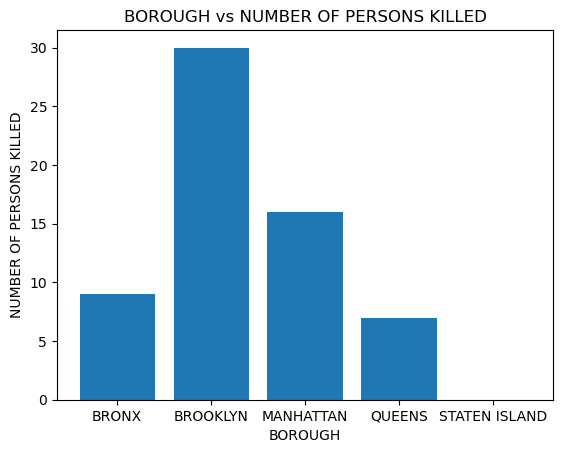

In [112]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title('BOROUGH vs NUMBER OF PERSONS KILLED')
ax.set_xlabel('BOROUGH')
ax.set_ylabel('NUMBER OF PERSONS KILLED')

In [113]:
x1=df3_accidentes.index
x1

Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], dtype='object', name='BOROUGH')

In [114]:
y1=df3_accidentes["NUMBER OF PERSONS INJURED"]
y1

BOROUGH
BRONX             880.0
BROOKLYN         2182.0
MANHATTAN         496.0
QUEENS           1334.0
STATEN ISLAND     153.0
Name: NUMBER OF PERSONS INJURED, dtype: float64

Se analiza si hay mas heridos por ciudad.

Text(0, 0.5, 'NUMBER OF PERSONS INJURED')

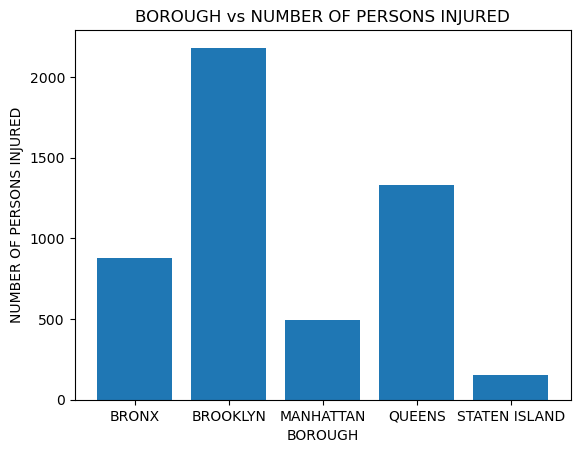

In [115]:
fig, ax = plt.subplots()
ax.bar(x1,y1)
ax.set_title("BOROUGH vs NUMBER OF PERSONS INJURED")
ax.set_xlabel('BOROUGH')
ax.set_ylabel('NUMBER OF PERSONS INJURED')

In [116]:
muertes_peatones=df2_accidentes['NUMBER OF PEDESTRIANS KILLED'].sum()
muertes_peatones

25

In [117]:
muertes_ciclista=df2_accidentes["NUMBER OF CYCLIST KILLED"].sum()
muertes_ciclista

4

In [118]:
muertes_motos=df2_accidentes["NUMBER OF MOTORIST KILLED"].sum()
muertes_motos 

33

In [ ]:
muertes_peatones
muertes_ciclista
muertes_motos

In [2]:
x_torta = ['peatones','ciclistas','motoristas']
y_torta = [muertes_peatones,muertes_ciclista,muertes_motos]
y_torta

NameError: name 'muertes_peatones' is not defined

Se analiza la cantidad de muertes tanto de peatones, ciclistas y conductores.

([<matplotlib.patches.Wedge at 0x1bb9acabcd0>,
 [Text(0.32929942576105575, 1.0495531850237219, 'peatones'),
  Text(-1.0108535980228326, 0.4337914284126578, 'ciclistas'),
  Text(-0.11128504841995303, -1.0943562664864532, 'motoristas')])

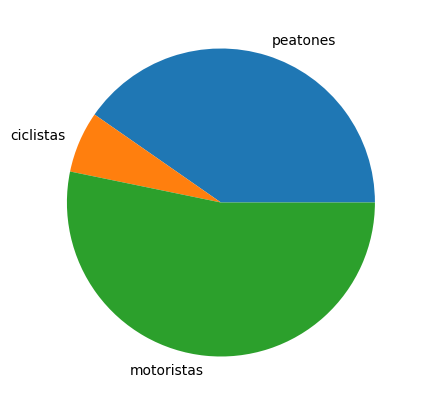

In [120]:
fig,ax = plt.subplots(figsize =(15, 5))
ax.pie(y_torta, labels=x_torta, )

In [121]:
heridos_peatones=df2_accidentes['NUMBER OF PEDESTRIANS INJURED'].sum()
heridos_peatones

137

In [122]:
heridos_ciclistas=df2_accidentes['NUMBER OF CYCLIST INJURED'].sum()
heridos_ciclistas

35

In [123]:
heridos_motos=df2_accidentes['NUMBER OF MOTORIST INJURED'].sum()
heridos_motos

4866

In [ ]:
heridos_peatones
heridos_ciclistas
heridos_motos
muertes_peatones
muertes_ciclista
muertes_motos

In [124]:
x_torta2 = ['peatones','ciclistas','motoristas']
y_torta2 = [heridos_peatones,heridos_ciclistas,heridos_motos]
y_torta2

[137, 35, 4866]


Se analiza la cantidad de heridos tanto de peatones, ciclistas y conductores.

([<matplotlib.patches.Wedge at 0x1bb9ac9c400>,
 [Text(1.0959883496252774, 0.09385913639950735, 'peatones'),
  Text(1.0796427582465409, 0.21064547126819874, 'ciclistas'),
  Text(-1.093678986463431, -0.11775514667445491, 'motoristas')])

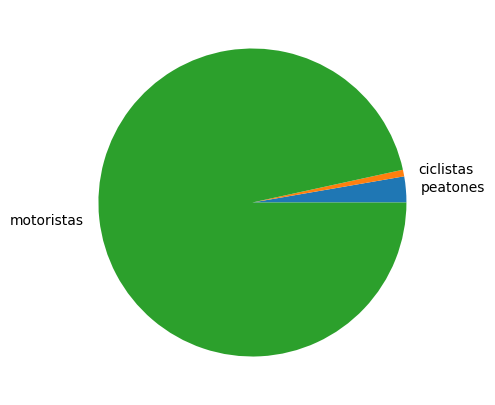

In [125]:
fig,ax = plt.subplots(figsize =(10, 5))
ax.pie(y_torta2, labels=x_torta2, )

Se analiza en que horario/ periodo del dia hubo mas heridos.

<AxesSubplot:xlabel='hora', ylabel='NUMBER OF MOTORIST INJURED'>

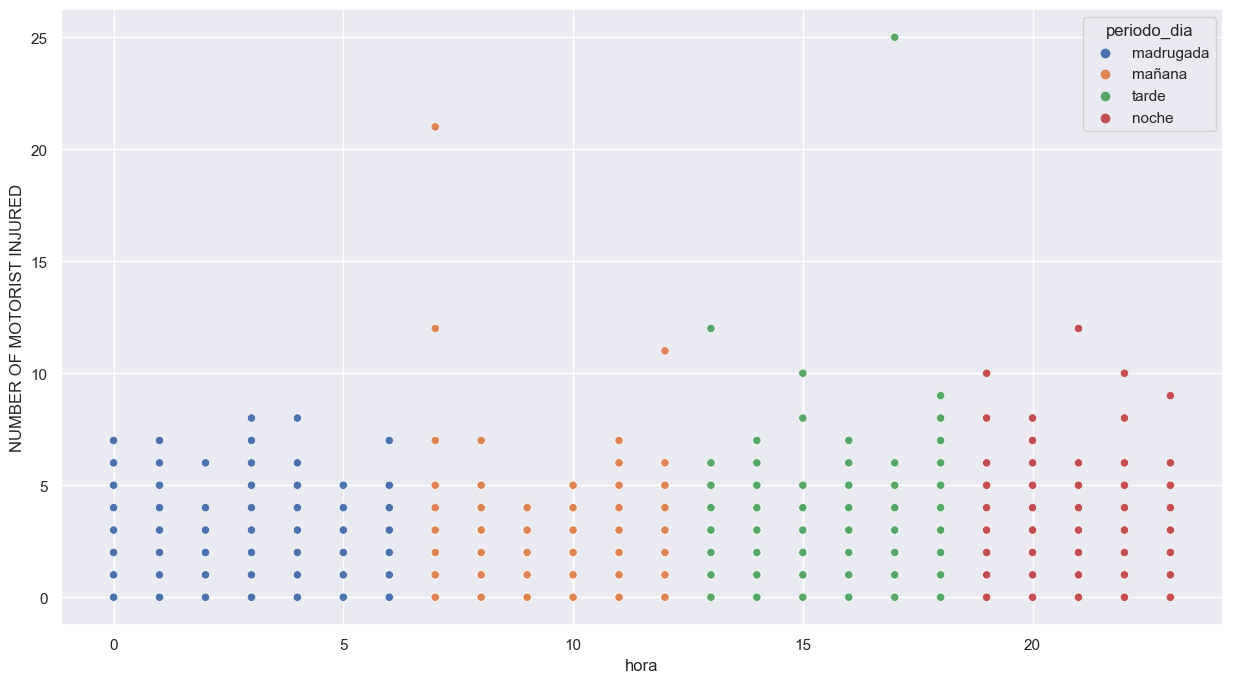

In [158]:
sns.scatterplot(data=df2_accidentes, x="hora", y="NUMBER OF MOTORIST INJURED", hue="periodo_dia")

Se analiza distrubucion y varianza de las personas heridas por periodo de dia

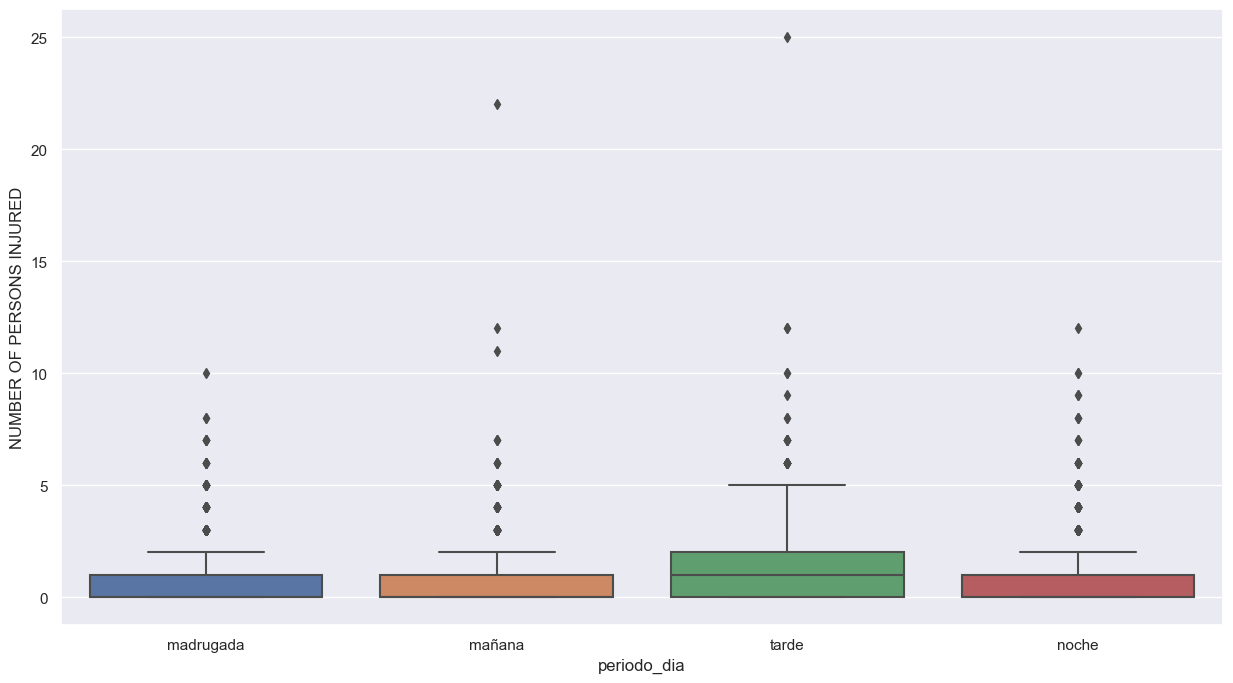

In [160]:
ax = sns.boxplot(x="periodo_dia", y="NUMBER OF PERSONS INJURED", data=df2_accidentes)

In [162]:
total_heridos=df2_accidentes['NUMBER OF PEDESTRIANS INJURED']+df2_accidentes['NUMBER OF PEDESTRIANS KILLED']
total_heridos

335        0
442        0
898        0
1035       0
1264       0
          ..
2101539    0
2101827    0
2101838    0
2101914    0
2102113    0
Length: 5725, dtype: int64

In [176]:
heridos_peatones
heridos_ciclistas
heridos_motos
muertes_peatones
muertes_ciclista
muertes_motos

total_aux = [heridos_peatones, heridos_ciclistas, muertes_peatones, muertes_ciclista]
tipo_aux = ['peatones', 'ciclistas', 'peatones', 'ciclistas']
condicion_aux = ['heridos', 'heridos', 'muertos', 'muertos']

In [178]:
df_aux = pd.DataFrame()
df_aux

""


In [179]:
df_aux["total_aux"]=total_aux
df_aux["tipo_aux"]=tipo_aux
df_aux["condicion_aux"]=condicion_aux
df_aux

,total_aux,tipo_aux,condicion_aux
0,137,peatones,heridos
1,35,ciclistas,heridos
2,25,peatones,muertos
3,4,ciclistas,muertos


Se analiza la cantidad de heridos y muertos en personas que no son conductoras.

<AxesSubplot:xlabel='tipo_aux', ylabel='total_aux'>

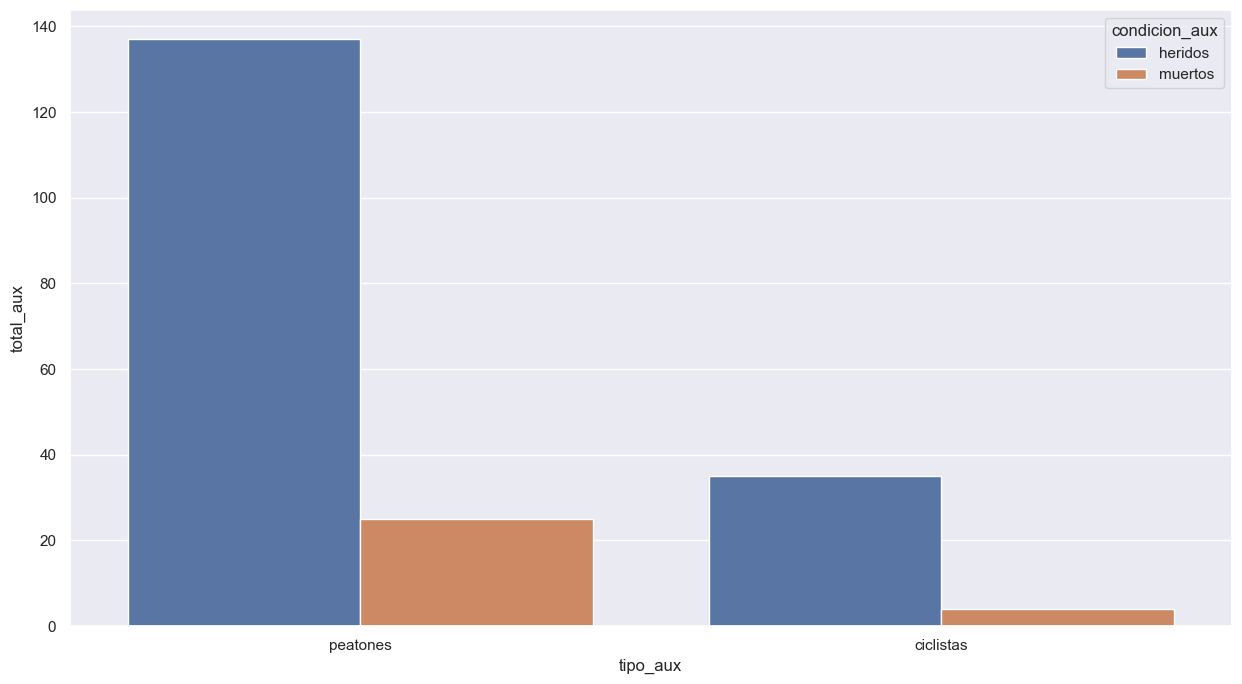

In [180]:
 sns.barplot(x="tipo_aux", y="total_aux", hue="condicion_aux", data=df_aux)

In [142]:
df2_accidentes.periodo_dia.value_counts()

madrugada    5725
Name: periodo_dia, dtype: int64

In [143]:
df2_accidentes.hora.value_counts()

0     330
4     315
1     291
2     291
5     285
22    281
3     267
23    255
21    254
16    251
17    241
18    239
6     234
15    229
20    217
19    216
8     215
14    206
9     203
10    185
13    185
11    184
12    179
7     172
Name: hora, dtype: int64

------------------------------------------------------------------------------